In [1]:
import json

import numba
import numpy

from matplotlib import pyplot

In [2]:
@numba.njit()
def are_coefficients_valid(a_1: float, a_2: float, a_3: float, b: float) -> bool:
    if not a_1 ** 3 - 12 * a_2 * b ** 2 > 0:
        return False

    if not a_1 ** 2 * a_2 - 30 * a_3 * b ** 2 > 0:
        return False

    if not 4 * a_2 ** 2 - 9 * a_1 * a_3 > 0:
        return False

    if not 2 * a_2 - 3 * a_1 * a_3 > 0:
        return False

    if not 84 * a_2 ** 2 - 45 * a_1 * a_3 > 0:
        return False

    return True

In [3]:
def coefficients(start_point: float, end_point: float, step_size: float) -> tuple:
    num_points = int((end_point - start_point) / step_size)
    for a_1_i in range(1, num_points):
        for a_2_i in range(1, num_points):
            for a_3_i in range(1, num_points):
                for b_i in range(1, num_points):
                    a_1 = start_point + a_1_i * step_size
                    a_2 = start_point + a_2_i * step_size
                    a_3 = start_point + a_3_i * step_size
                    b = start_point + b_i * step_size

                    if not are_coefficients_valid(a_1, a_2, a_3, b):
                        continue

                    yield a_1, a_2, a_3, b


In [26]:
@numba.njit
def get_f(a_1, a_2, a_3, b, x_0=0.0, y_0=0.0, num_iter=20000):
    x = [x_0]
    y = [y_0] 
    
    for i in range(num_iter - 1):
        x_new = 1 - a_1 * x[i] ** 2 - a_2 * x[i] ** 4 - a_3 * x[i] ** 6  + b * y[i]
        y_new = b * x[i]
        
        x.append(x_new)
        y.append(y_new)

    return x, y

In [27]:
valid_coefficients = list()

for a_1, a_2, a_3, b in coefficients(0, 1, 0.01):
    try:
        x, y = get_f(a_1, a_2, a_3, b)
        valid_coefficients.append((a_1, a_2, a_3, b))
    except OverflowError:
        continue

In [7]:
valid_coefficients[0]

(0.04, 0.04, 0.01, 0.01)

In [29]:
x, y = get_f(*valid_coefficients[20060])

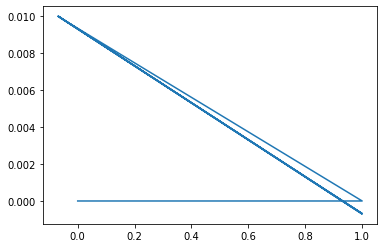

In [30]:
pyplot.plot(x, y)